# Parabolic partial differential equations

Part of this notebook is adapted from [David Miller's course](https://github.com/UChicagoPhysics/PHYS250) at UChicago

In [1]:
import numpy as np

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, Image

%matplotlib inline


# Partial differential equations

+ Think of these as an infinite set of ordinary differential equations is called a partial differential equation (PDE).
+ In numerical methods, we split up this set into a finite set of ODEs, usually by "meshing" the domain into a finite set of points.

There are several types of PDEs, elliptical, hyperbolic, and parabolic.



| Type     | Equation | Example     |
| :---        |    :----:   |    :----:   |
| Elliptical      | $u'' + u'' = 0$      | Laplace's equation      |
| Hyperbolic      | $\ddot{u} = u''$       | Wave equation      |
| Parabolic      | $\dot{u} = u''$       | Heat equation      |

where $u' = \frac{\partial u}{\partial x}$ and $\dot{u} = \frac{\partial u}{\partial t}$ in the table


#### Today, we will focus on elliptical and parabolic PDEs

# Laplace's Equation, Boundary Value Problems, and Finite Difference Methods

Numerical solutions to many physical problems can be found using finite difference methods. In this approach, a regular grid is imposed on a region. At each point on the grid, the differential equation governing the system is approximated. The resulting equations are then solved iteratively. The relaxation method is a relatively simple example. The problem is to find the potential $V$ in empty regions ($\rho$ = 0) when $V$ is known on the boundaries.

The Laplace equation is of fundamental importance in physics, and is most often first encountered in electrodynamics.

$$
\nabla^{2} V = 0.
$$

The solution to Laplace's equation can be thought of as taking many small averages around each point and then assigning those averages to the point in the middle. 

For simple surfaces---flat planes, cylinders, spheres---it is easy to solve these systems analytically. 

However, when the geometry of the system becomes complex, it is often necessary to evaluate the solutions to Laplace's equation numerically, typically using a simple program that iteratively averages around the point at which the solution is being evaluated.

## Boundary Value Problem

Given a specification of the potential $V$ on the boundary of a region, we wish to find the the solution to Laplace's equation in order to find the potential $V$ everywhere in the region.

## Relaxation Methods for solving the heat equation

In E&M, we're often taught the solution to Laplace's equation in two dimensions, $V(x,y)$, can be found by evaluating:

$$
V(x,y) = \frac{1}{2\pi R} \oint_{\rm circle} V dl
$$

iteratively, until the change in $V(x,y)$ on successive evaluations of this expression is smaller than some tolerance. 


If the path is taken as a single mesh cell, then this can be written as:

$$
V_{i,j} = \frac{1}{4} \left( V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1} \right)
$$

where $V_{i,j}$ is the value of $V$ at the point $(x_i, y_j)$.

In [6]:
class LaplaceEquation:
    """
    Class to solve the Laplace equation in 2D using the Jacobi method.

    Attributes:
        initial_lattice (np.ndarray): Initial lattice with boundary conditions
        max_iterations (int): Maximum number of iterations
        tolerance (float): Tolerance for convergence
        store_history (bool): Whether to store the history of the grid at each iteration

    Methods:
        solve: Solve the Laplace equation
        update_grid: Update the grid site-by-site

    """

    def __init__(self, initial_lattice, max_iterations=10000, tolerance=1e-4, store_history=False):
        self.initial_lattice = initial_lattice
        self.n, self.m = initial_lattice.shape
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.store_history = store_history

    def solve(self):

        ## Initialize grid with zeros
        grid = np.copy(self.initial_lattice)

        if self.store_history:
            self.history = [grid.copy()]

        ## Iterate until convergence
        for iteration in range(self.max_iterations):
            # Copy current grid
            grid_old = np.copy(grid)

            # The actual update and physical simulation goes here
            grid = self.update_grid(grid)
            #y = self.update(t, y)

            ## Store history
            if self.store_history:
                self.history.append(grid.copy())

            ## Check for convergence
            if np.linalg.norm(grid - grid_old) < self.tolerance:
                print('Converged after {} iterations.'.format(iteration))
                break

        return grid

    def update_grid(self, grid):

        # ## Update grid site-by-site
        # for i in range(1, self.n - 1):
        #     for j in range(1, self.m - 1):
        #         grid[i, j] = 0.25 * (grid[i - 1, j] + grid[i + 1, j] + grid[i, j - 1] + grid[i, j + 1])

         ## Vectorized implementation of the above loop
        grid[1:-1, 1:-1] = 0.25 * (grid[0:-2, 1:-1] + grid[2:, 1:-1] + grid[1:-1, 0:-2] + grid[1:-1, 2:])
        grid[1:-1, 1:-1] = 0.25 * (grid[0:-2, 1:-1] + grid[2:, 1:-1] + grid[1:-1, 0:-2] + grid[1:-1, 2:])

        return grid



Text(0.5, 1.0, 'East')

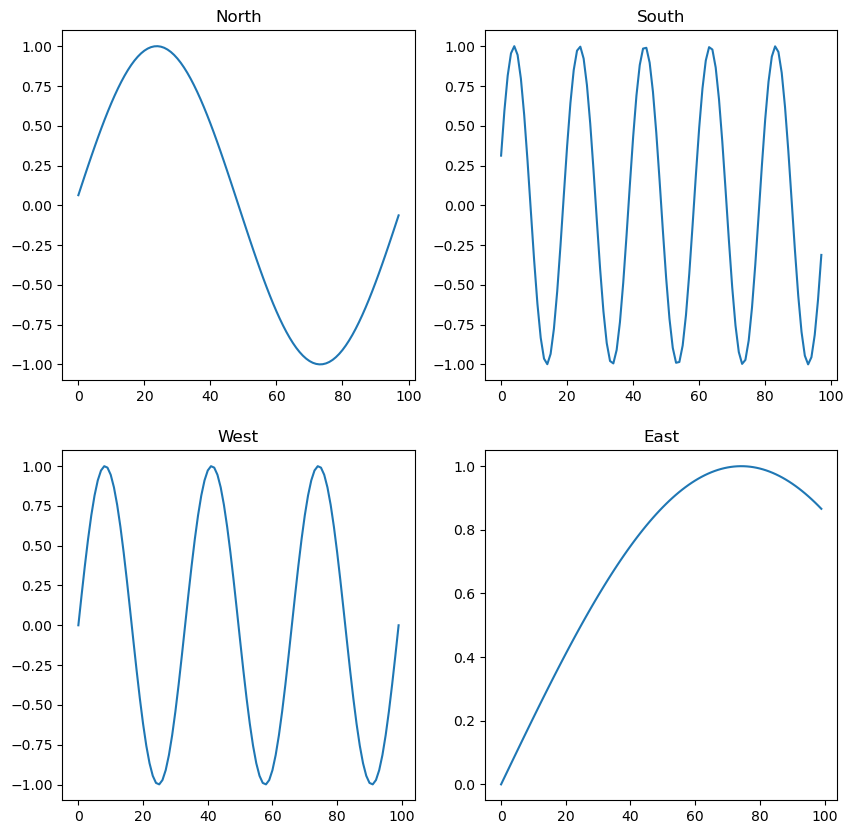

In [7]:
# Define initial lattice and complex boundary conditions
n_x = 100
initial_lattice = np.zeros((n_x, n_x))
initial_lattice[0, :] = np.sin(np.linspace(0, 2 * np.pi, n_x))
initial_lattice[-1, :] = np.sin(np.linspace(0, 2 * np.pi * 5, n_x))
initial_lattice[:, 0] = np.sin(np.linspace(0, 2 * np.pi * 3, n_x))
initial_lattice[:, -1] = np.sin(np.linspace(0, 2 * np.pi / 3, n_x))

## Plot North, South, East, and West boundary conditions
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.plot(initial_lattice[0, 1:-1])
plt.title('North')
plt.subplot(222)
plt.plot(initial_lattice[-1, 1:-1])
plt.title('South')
plt.subplot(223)
plt.plot(initial_lattice[:, 0])
plt.title('West')
plt.subplot(224)
plt.plot(initial_lattice[:, -1])
plt.title('East')

Converged after 5023 iterations.


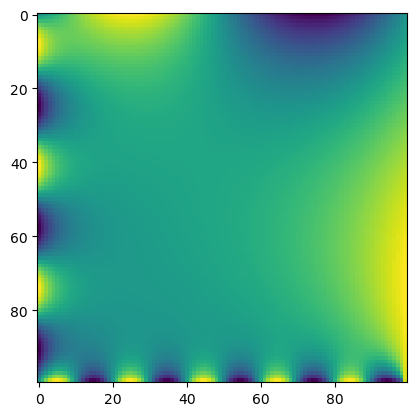

In [8]:
# Solve Laplace equation
model = LaplaceEquation(initial_lattice, max_iterations=10000, store_history=True)

grid = model.solve()

# Plot grid
plt.imshow(grid, interpolation='nearest')

In [9]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    plt.figure(figsize=(6, 6))
    plt.imshow(model.history[i], interpolation='nearest')
    plt.axis('off')
    plt.show()

interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(model.history) - 1, 1, layout=Layout(width='800px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='800px'), max=5024), Output()), …

<function __main__.plotter(i)>

### Does this match our intuition?

+ What does the diffusion term do to field flucuations?
+ Intermediate values theorem for harmonic functions: extrema always on boundaries, therefore no interior extrema are possible.
+ Synchronous vs asynchronous updating (recall from cellular automata)

## Another approach: Convolutions

+ The inner loop of our solution method consists of visiting each point in the mesh and updating its value based on the average of its neighbors. This is a very simple operation, but it is repeated many times.
+ This is extremely similar to the Game of Life, and other cellular automata that we saw earlier during the course.
+ Mathematically, we can think of the Laplace equation as a convolution of the potential with a kernel that is a function of the distance between the points.

Mathemtically, a convolution has the form:

$$
f*g = \int_{-\infty}^{\infty} f(x) g(x-y) dx
$$

where $f$ and $g$ are functions, and $*$ is the convolution operator. In discrete form, this becomes:

$$
f*g = \sum_{i} f(x_i) g(x_i - y_j)
$$

where $f$ and $g$ are now arrays of values, and $*$ is the discrete convolution operator. The convolutional kernel is the function $g$, and it usually only exists on a compact interval. For the Laplace equation, the kernel in continuous time is a Gaussian, and in discrete time is a function that returns only the values of North, South, East, and West neighbors.

In [10]:
from scipy.signal import convolve2d

class LaplaceEquationConvolution(LaplaceEquation):

    def __init__(self, initial_lattice, max_iterations=10000, tolerance=1e-4, store_history=False):
        super().__init__(initial_lattice, max_iterations, tolerance, store_history)

    def update_grid(self, grid):

        ## Define convolution kernel (von Neumann neighborhood)
        kernel = 0.25 * np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

        ## Convolve grid with kernel. Note how we handle the boundary conditions.
        grid[1:-1, 1:-1] = convolve2d(grid, kernel, mode='same')[1:-1, 1:-1]

        return grid

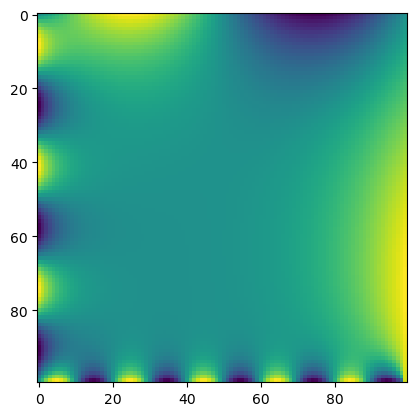

In [11]:
## Solve Laplace equation
model = LaplaceEquationConvolution(initial_lattice, max_iterations=1000)

grid = model.solve()

# Plot grid
plt.imshow(grid, interpolation='nearest')

### Remember the convolution theorem?

$$
\mathcal{F}[f*g] = \mathcal{F}[f] \cdot \mathcal{F}[g]
$$
where $\mathcal{F}$ is the Fourier transform. This is a very useful result, because it allows us to convolve functions in the frequency domain, which is much faster than convolving in the time domain.

+ This is a clue that the Fourier transform is a useful tool for solving PDEs.
+ Intuition: sines and cosines are the eigenfunctions of translation operators



## Solving in time: Finite-differences

+ With the Laplace equation, we were able to use our domain knowledge to devise a *relaxation* solution scheme that approximates the path integral around a mesh cell.

+ In general, we can't do this. Instead, we must use a more general method to solve the differential equation. The simplest method is to use a finite-difference method, which is a method of approximating the derivative of a function by using the values of the function at two or more points.

+ Suppose that we want to solve the heat equation in a 2D domain, $u(x,y,t)$, where the initial condition is $u(x,y,0) = f(x,y)$, and the boundary conditions are $u(x,y,t) = 0$ for $x = 0$ and $x = L$. The heat equation is:

$$
\frac{\partial u}{\partial t} = D \left( \frac{\partial^{2} u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}} \right)
$$

where $\alpha$ is the thermal diffusivity. We can solve this equation by discretizing in time, and then using the finite difference method to discretize in space. The resulting equation is:

$$
\frac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta t} = D \left( \frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n}}{\Delta x^{2}} + \frac{u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{\Delta y^{2}} \right)
$$

where $u_{i,j}^{n}$ is the value of $u$ at the point $(x_i, y_j)$ at time $t_n$. We can rearrange this equation to solve for $u_{i,j}^{n+1}$:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} + D\left( \frac{\Delta t}{\Delta x^{2}} \left( u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n} \right) + \frac{\Delta t}{\Delta y^{2}} \left( u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n} \right) \right)
$$

We can use the same approach as before, and use a loop to update the values of $u$ at each time step.

/var/folders/xt/9wdl4pmx26gf_qytq8_d528c0000gq/T/ipykernel_72775/2502654164.py:55: RuntimeWarning: overflow encountered in subtract
  grid[1:-1, 1:-1] += self.dt * self.diffusivity * (k2 + k3 + k4 + k5 - 4 * k1) / self.dx**2
/var/folders/xt/9wdl4pmx26gf_qytq8_d528c0000gq/T/ipykernel_72775/2502654164.py:55: RuntimeWarning: invalid value encountered in add
  grid[1:-1, 1:-1] += self.dt * self.diffusivity * (k2 + k3 + k4 + k5 - 4 * k1) / self.dx**2


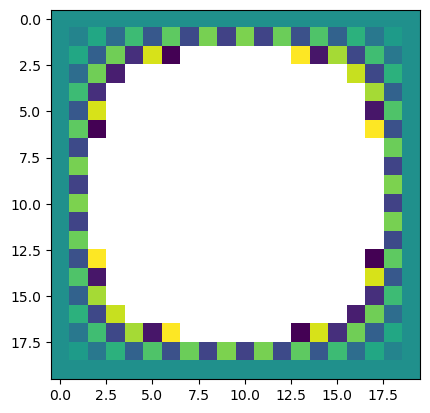

In [35]:
class LaplaceFiniteDifference:

    def __init__(self, initial_lattice, diffusivity=1.0, dt=1e-3, L=1.0, max_iterations=10000, tolerance=1e-4, store_history=False):
        self.initial_lattice = initial_lattice
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.store_history = store_history
        self.diffusivity = diffusivity
        self.dt = dt
        self.dx = L / (initial_lattice.shape[0] - 1)

    def solve(self):

        ## Initialize grid
        grid = self.initial_lattice.copy()

        ## Initialize history
        if self.store_history:
            self.history = [grid.copy()]

        ## Initialize iteration counter
        iteration = 0

        ## Initialize error
        error = np.inf

        ## Iterate until convergence
        while iteration < self.max_iterations and error > self.tolerance:
                
                ## Update grid
                grid = self.update_grid(grid)
    
                ## Update error
                error = np.max(np.abs(grid - self.history[-1]))
    
                ## Update iteration counter
                iteration += 1
    
                ## Update history
                if self.store_history:
                    self.history.append(grid.copy())

        return grid

    def update_grid(self, grid):
        ## Update grid using finite difference method
        
        k1 = grid[1:-1, 1:-1]

        k2 = grid[1:-1, 2:]
        k3 = grid[1:-1, :-2]
        k4 = grid[2:, 1:-1]
        k5 = grid[:-2, 1:-1]

        grid[1:-1, 1:-1] += self.dt * self.diffusivity * (k2 + k3 + k4 + k5 - 4 * k1) / self.dx**2

        return grid





        

# Define initial lattice and complex boundary conditions
n_x = 20
initial_lattice = np.zeros((n_x, n_x))
initial_lattice[0, :] = np.sin(np.linspace(0, 2 * np.pi, n_x))
initial_lattice[-1, :] = np.sin(np.linspace(0, 2 * np.pi * 5, n_x))
initial_lattice[:, 0] = np.sin(np.linspace(0, 2 * np.pi * 3, n_x))
initial_lattice[:, -1] = np.sin(np.linspace(0, 2 * np.pi / 3, n_x))

from scipy.signal import convolve2d

## Solve Laplace equation
model = LaplaceFiniteDifference(initial_lattice, dt=1e-3, max_iterations=10000, store_history=True)

grid = model.solve()

# Plot grid
plt.imshow(model.history[-1], interpolation='nearest')





### Try modifying the space and time steps. What happens to the solution?

<!-- $$
u_{i,j}^{n+1} = u_{i,j}^{n} + \frac{D\Delta t}{2} \left( \frac{1}{\Delta x^{2}} \left( u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n} \right) + \frac{1}{\Delta y^{2}} \left( u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n} \right) \right)
$$

$$
+ \frac{D\Delta t}{2} \left( \frac{1}{\Delta x^{2}} \left( u_{i+1,j}^{n+1} - 2u_{i,j}^{n+1} + u_{i-1,j}^{n+1} \right) + \frac{1}{\Delta y^{2}} \left( u_{i,j+1}^{n+1} - 2u_{i,j}^{n+1} + u_{i,j-1}^{n+1} \right) \right)
$$ -->

<!-- $$
u_{i,j}^{n+1} = u_{i,j}^{n} + \frac{D\Delta t}{2} \left( \frac{1}{\Delta x^{2}} \left( u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n} \right) + \frac{1}{\Delta y^{2}} \left( u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n} \right) \right)
$$

$$
+ \frac{D\Delta t}{2} \left( \frac{1}{\Delta x^{2}} \left( u_{i+1,j}^{n+1} - 2u_{i,j}^{n+1} + u_{i-1,j}^{n+1} \right) + \frac{1}{\Delta y^{2}} \left( u_{i,j+1}^{n+1} - 2u_{i,j}^{n+1} + u_{i,j-1}^{n+1} \right) \right)
$$ -->

### The 1D Laplacian is a matrix

The 1D Laplacian is a matrix, and we can use matrix algebra to represent some operators. If we have $N$ points in our discretized mesh of $\mathbf{u}$, then 1D Laplacian is given by and $N \times N$ matrix:

$$
\mathbf{L} = \frac{1}{\Delta x^{2}} \left( \begin{array}{ccccccccc}
-2 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & \cdots & 0 & 0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & -2 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & \cdots & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 0 & \cdots & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & \cdots & 0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & -2 \\
\end{array} \right)
$$


In 2D we are not so lucky. We have to use convolutions, or flatten the $N \times N$ lattice into a vector of length $N^2$. I'll use the latter approach here, which will allow us to solve directly for $\mathbf{u}^{n+1}$ by inverting a large matrix equation.

## Boundary conditions

+ For our examples so far, we've specified the boundary conditions as $u(\mathbf{x}, t) = u_0(\mathbf{x})$ for all $\mathbf{x} \in \partial \Omega$, where $\Omega$ denotes our solution domain (square, disk, etc). 
+ Our cases so far have been *Dirichlet* boundary conditions, where we specify the value of $u$ at the boundary.
+ We can also have *Neumann* boundary conditions, where we specify the value of the derivative of $u$ at the boundary. For example, we could specify $\nabla u(\mathbf{x}, t) \cdot \mathbf{\hat{t}} = f_0(\mathbf{x})$ for all $\mathbf{x} \in \partial \Omega$, where $\mathbf{\hat{t}}$ is a unit vector normal to the boundary. This type of boundary condition specifies a fixed flux of the scalar field through the boundary.
+ We can also have *mixed* or Robin boundary conditions, where we specify a combination of Dirichlet and Neumann boundary conditions. $u(\mathbf{x}, t) + \nabla u(\mathbf{x}, t) \cdot \mathbf{\hat{t}}  = g_0(\mathbf{x})$ for all $\mathbf{x} \in \partial \Omega$.


### 1D Laplacian with various boundary conditions

The 1D Laplacian with Dirichlet boundary conditions has the form

$$
\mathbf{L} = \frac{1}{\Delta x^{2}} \left( \begin{array}{ccccccccc}
-2 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & \cdots & 0 & 0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & -2 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & \cdots & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 0 & \cdots & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & \cdots & 0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & -2 \\
\end{array} \right)
$$

The 1D Laplacian with Neumann (reflection) boundary conditions has the form

$$
\mathbf{L} = \frac{1}{\Delta x^{2}} \left( \begin{array}{ccccccccc}
-1 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & \cdots & 0 & 0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & -2 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & \cdots & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 0 & \cdots & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & \cdots & 0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & -1 \\
\end{array} \right)
$$

The 1D Laplacian with periodic boundary conditions has the form

$$
\mathbf{L} = \frac{1}{\Delta x^{2}} \left( \begin{array}{ccccccccc}
-2 & 1 & 0 & \cdots & 0 & 0 & 0 & 0 & 1 \\
1 & -2 & 1 & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & \cdots & 0 & 0 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \cdots & -2 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & \cdots & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 0 & \cdots & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & \cdots & 0 & 0 & 1 & -2 & 1 \\
1 & 0 & 0 & \cdots & 0 & 0 & 0 & 1 & -2 \\
\end{array} \right)
$$



## Stability of finite difference schemes

Recall that a linear dynamical system has the form

$$
\mathbf{x}_{t + 1} = A \mathbf{x}_{t}
$$

where $A$ is a matrix. We can think of this as a map from $\mathbb{R}^N \to \mathbb{R}^N$.

Depending on whether $\max_i |\lambda_i| < 1$, $\max_i |\lambda_i| = 1$, or $\max_i |\lambda_i| > 1$, the system will be stable, marginally stable, or unstable.

Eigenvalues of symmetric transition matrix:  [2.6673769  0.05567161]


Text(0.5, 0, 'Time step')

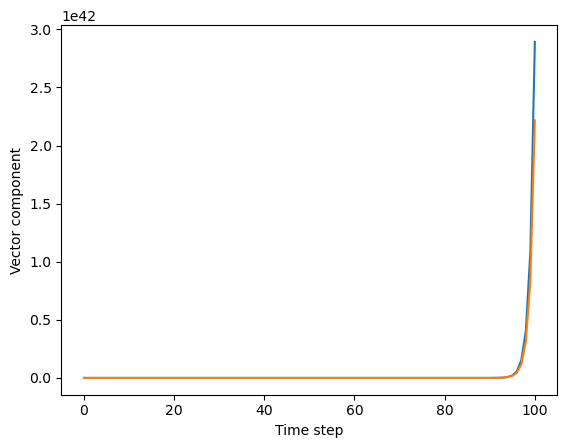

In [2]:
a = np.random.random((2, 2))
a += a.T

print("Eigenvalues of symmetric transition matrix: ", np.linalg.eigvals(a))

all_u = [np.random.random(2)]
for _ in range(100):
    all_u.append(a @ all_u[-1])

all_u = np.array(all_u)

plt.plot(all_u[:, 0])
plt.plot(all_u[:, 1])

plt.ylabel("Vector component")
plt.xlabel("Time step")


## Stability analysis of a finite difference scheme

In one dimension, the diffusion equation is given by

$$
\frac{\partial}{\partial t}u(x,t) = D\frac{\partial^2}{\partial x^2} u(x,t)
$$

We can approximate this equation using first-order finite differences in space and time

$$
\frac{u(x, t + \Delta t) - u(x, t)}{\Delta t} = D \frac{u(x + \Delta x, t) - 2 u(x, t) + u(x - \Delta x, t)}{\Delta x^2}
$$

We use the index $i$ to denote different lattice points in space, and $n$ to denote different time steps. We rearrange terms to write this equation as a matrix equation that updates $u_i$ at each time step

$$
u_i^{n + 1} = u_i^n + \frac{\Delta t D}{\Delta x^2} \left(u_{i + 1}^n - 2 u_i^n + u_{i - 1}^n\right)
$$

Notice that we can write the right-hand side of this differential equation as a constant matrix $\mathbb{I} + A$ acting on the vector $\mathbf{u}^n$

$$
\mathbf{u}^{n + 1} = \left(\mathbb{I} + \frac{\Delta t D}{\Delta x^2}A\right) \mathbf{u}^n
$$

where $A$ is a tridiagonal matrix with $-2$ on the diagonal, and $1$ on the off-diagonals. In general, we can always write *linear* partial differential equations as linear matrix equations in discrete time.


Text(0, 0.5, 'x')

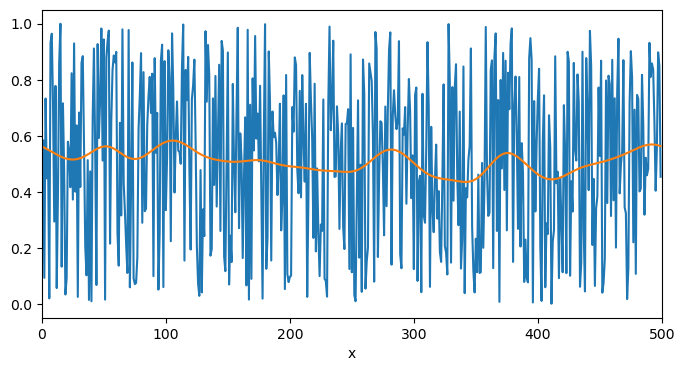

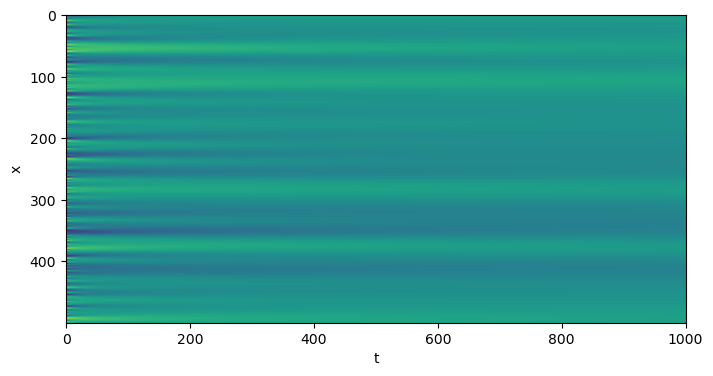

In [3]:
def laplacian(n, dx=1.0):
    """
    Create a one-dimensional discrete Laplacian operator with periodic boundary conditions.

    Args:
        n (int): The number of grid points.
        dx (float): The grid spacing.

    Returns:
        ndarray: The Laplacian operator in one dimension.
    """
    op = np.zeros((n, n))

    # set diag to -2
    np.fill_diagonal(op, -2)

    # set off-diag to 1
    np.fill_diagonal(op[:, 1:], 1)
    np.fill_diagonal(op[1:, :], 1)

    # set periodic boundary conditions
    op[0, -1] = 1
    op[-1, 0] = 1

    return op / dx**2


class DiscretizedPDE:
    """
    A base class for discretized PDEs in one dimension.

    Parameters
        n (int): The number of grid points in one dimension
        dx (float): The grid spacing
        dt (float): The time step
        store_history (bool): Whether to store the history of the solution
        random_state (int): The random seed

    """

    def __init__(self, n, dx=1.0, dt=1.0, store_history=True, random_state=0):
        self.n = n
        self.dt = dt
        self.dx = dx
        self.store_history = store_history
        self.random_state = random_state

    def rhs(self, u):
        raise NotImplementedError
    
    def solve(self, u0, nt):
        u = u0
        if self.store_history:
            self.history = [u0.copy()]
        for i in range(nt):
            u += self.rhs(u) * self.dt
            if self.store_history:
                self.history.append(u.copy())
        return u
    
class DiffusionEquation(DiscretizedPDE):
    """
    A class for discretized diffusion equations in one dimension.
    """
    def __init__(self, D=1.0, **kwargs):
        super().__init__(**kwargs)
        self.D = D
        self.lap = laplacian(self.n, self.dx)

    def rhs(self, u):
        return self.D * self.lap @ u
    
eq = DiffusionEquation(n=500, dx=1.0, dt=0.1, D=1.0, store_history=True)

# Initial condition
u0 = np.random.random(500).copy()

# Solve the equation
u = eq.solve(u0, 1000)

plt.figure(figsize=(8, 4))
plt.plot(eq.history[0])
plt.plot(eq.history[-1])
plt.xlim(0, len(u0))
plt.xlabel("x")
    
plt.figure(figsize=(8, 4))
plt.imshow(np.array(eq.history).T, aspect='auto')
plt.xlabel("t")
plt.ylabel("x")


### Can we perform fewer operations?

Suppose we want to do the numerical integration a lot faster. One option might be to increase $\Delta t$ and $\Delta x$. But is there a limit to how far we can go? Let's do a simple experiment to find out.

Text(0, 0.5, 'Max field value')

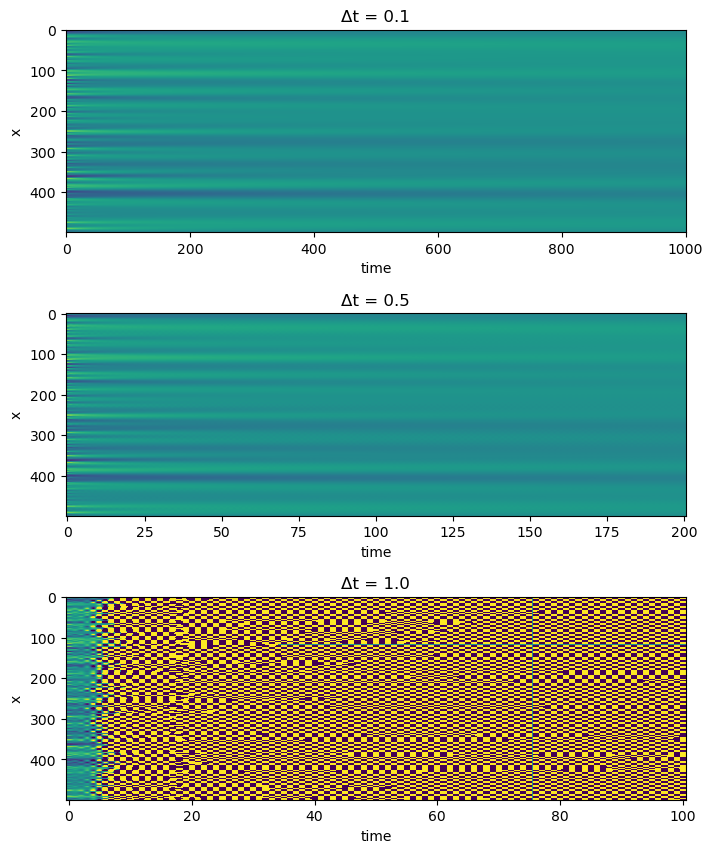

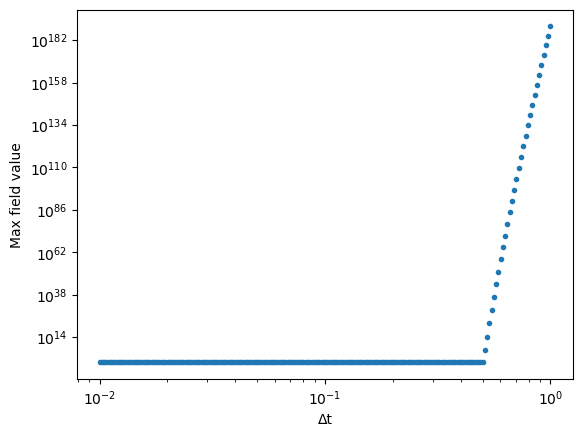

In [4]:

# Initial condition
u0 = np.random.random(500)


# make three subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))
plt.subplots_adjust(wspace=0.0, hspace=0.4)

eq = DiffusionEquation(n=500, dx=1.0, dt=0.1, D=1.0, store_history=True)
u = eq.solve(u0.copy(), 1000)

# make figure subplot
plt.subplot(3, 1, 1)
plt.imshow(np.array(eq.history).T, aspect='auto', vmin=0, vmax=1)
plt.xlabel("time")
plt.ylabel("x")
plt.title("Δt = 0.1")

eq = DiffusionEquation(n=500, dx=1.0, dt=0.5, D=1.0, store_history=True)
u = eq.solve(u0.copy(), 200)
plt.subplot(3, 1, 2)
plt.imshow(np.array(eq.history).T, aspect='auto', vmin=0, vmax=1)
plt.xlabel("time")
plt.ylabel("x")
plt.title("Δt = 0.5")

eq = DiffusionEquation(n=500, dx=1.0, dt=1.0, D=1.0, store_history=True)
u = eq.solve(u0.copy(), 100)
plt.subplot(3, 1, 3)
plt.imshow(np.array(eq.history).T, aspect='auto', vmin=0, vmax=1)
plt.xlabel("time")
plt.ylabel("x")
plt.title("Δt = 1.0")


dt_vals = np.logspace(-2, 0, 200)
max_field = []
for dt_val in dt_vals:
    eq = DiffusionEquation(n=500, dx=1.0, dt=dt_val, D=1.0, store_history=True)
    u = eq.solve(u0.copy(), 400)
    max_field.append(np.max(np.abs(u)))

plt.figure()
plt.loglog(dt_vals, max_field, '.')
plt.xlabel("Δt")
plt.ylabel("Max field value")

Recall that our discrete time, discrete-space diffusion equation is

$$
\mathbf{u}^{n + 1} = \left(\mathbb{I} + \frac{\Delta t D}{\Delta x^2}A\right) \mathbf{u}^n
$$

Due to the periodic boundary conditions, can be shown that the eigenvalues of $\mathbb{I} + A$ are

$$
\lambda_n = 1 + \frac{\Delta t D}{\Delta x^2}\left(-2 - 2 \cos\left(\frac{\pi n}{N}\right)\right)
$$

where $N$ is the number of lattice points and $n \in [0, N - 1]$. 

<!-- The condition number of this matrix is therefore

$$
\kappa = \frac{|\lambda_{max}|}{|\lambda_{min}|}
$$

As $N \rightarrow \infty$, $\kappa \sim N \rightarrow \infty$ -->


Text(0, 0.5, 'Max Eigenvalue')

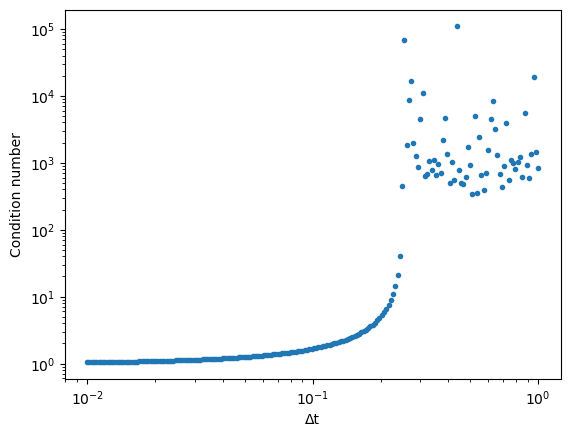

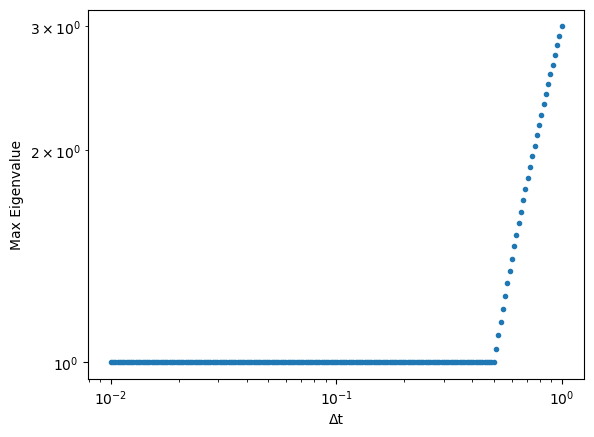

In [12]:
def eigenvalues_diffusion(n, dx=1.0, dt=1.0, D=1.0):
    """
    Compute the eigenvalues of the diffusion equation in one dimension.

    Args:
        n (int): The number of grid points.
        dx (float): The grid spacing.
        dt (float): The time step.
        D (float): The diffusion coefficient.

    Returns:
        ndarray: The eigenvalues of the diffusion equation.
    """
    nvals = np.arange(n)
    return 1 - (D * dt / dx**2) * (2 * np.cos(np.pi * nvals / n) + 2)

# plt.plot(eigenvalues_diffusion(500, dt=0.1, D=1.0))


max_eig, min_eig = [], []
all_conds = []
p2 = []
for dt_val in dt_vals:
    eigs_diff = eigenvalues_diffusion(500, dx=1.0, dt=dt_val, D=1.0)
    max_eig.append(np.max(np.abs(eigs_diff)))
    min_eig.append(np.min(np.abs(eigs_diff)))
    cond = np.max(np.abs(eigs_diff)) / np.min(np.abs(eigs_diff))
    all_conds.append(cond)
    # plt.plot(eigs_diff)

    ## We could also compute the condition number of the propagation matrix directly
    ## But this is more computationally expensive
    # eq = DiffusionEquation(n=500, dx=1.0, dt=dt_val, D=1.0)
    # prop = np.identity(500) + (eq.D * eq.dt / eq.dx**2) * eq.lap
    # cond = np.linalg.cond(prop)
    # all_conds.append(cond)



plt.figure()
plt.loglog(dt_vals, all_conds, '.')
plt.xlabel("Δt")
plt.ylabel("Condition number")

plt.figure()
plt.loglog(dt_vals, max_eig, '.')
plt.xlabel("Δt")
plt.ylabel("Max Eigenvalue")

# n=500, dx=1.0, dt=dt_val, D=1.0, 


### von Neumann stability condition

We can see that the abrupt divergence in the dynamics of the simulation arises from the largest-norm eigenvalue rapidly increasing as we increase $\Delta t$. This abrupt change suggests that an abrupt change occurs in the underlying spectrum $\lambda_n$.

It turns out that we can trace this discontinuity to the discontinuous max function in $\max_n |\lambda_{n}|$. The value of $i$ that maximizes $|\lambda_n|$ abruptly changes.

$$
\lambda_n = 1 - \frac{\Delta t D}{\Delta x^2}\left(2 + 2 \cos\left(\frac{\pi n}{N}\right)\right)
$$

Because this is a monotonic function, the only two options for the maximum $n$ occur at the endpoints of the interval $[0, N - 1]$. Thus, 

$$
\max_n |\lambda_{n}| = \left\{
    |1 - 4\frac{\Delta t D}{\Delta x^2}|, 
    1 - \frac{\Delta t D}{\Delta x^2}\left(2 + 2 \cos\left(\frac{\pi (N-1)}{N}\right)\right)
\right\}
$$

In the limit $N\rightarrow\infty$, we can simplify this expression,
$$
\max_n |\lambda_{n}| = \left\{
    |1 - 4\frac{\Delta t D}{\Delta x^2}|, \;\;\;
    1
\right\}
$$

The crossover point therefore corresponds to the condition

$$
\dfrac12 = \frac{\Delta t D}{\Delta x^2}
$$

which, for our parameter values, corresponds to $\Delta t = 1/2$. This condition relating the diffusivity, timestep, and lattice discretization represents an example of [von Neumann stability analysis](https://en.wikipedia.org/wiki/Von_Neumann_stability_analysis) for finite difference schemes.


# Questions

+ Why did we call the `laplacian` function in the `__init__` method of the `Diffusion` class? Why not call it within the `rhs` method?

+ A common hyperbolic PDE is the wave equation:

$$
\frac{\partial^2}{\partial t^2}u(x,t) = c^2\frac{\partial^2}{\partial x^2} u(x,t)
$$

where $c$ is the speed of the wave. Based on the form of the von Neumann condition, what would you expect the linear stability condition for this equation to be?